# How Tweets Influenced the Outcome of the2020 US Presidential Election

## Introduction

Social Media build an online community for people to gain information and share ideas rapidly. As a quick and effective form of communication, social media generates great visibility around business, political, and other social issues. Platform such as Twitter is increasingly used for people to share their views, especially during election time. Therefore, we want to find the relationship between the 2020 US presidential election outcome and Twitter’s various features. Given the data provided by Manch Hui, we conduct data analysis to examine our research question. The data is collected based on two main candidates - Donald Trump and Joe Biden, including relative tweets, time horizon and other user account information. 

To better illustrate the effect of tweets, we will proceed with the analysis through three perspectives - total exposure perspective, timeline perspective and geographical perspective. The outcome for all three perspectives is the result of the 2020 US Election(Joe Biden won), and the predictive covariates are “tweet”, “retweets”, “likes” and “users followers”.The total exposure perspective is solely based on the summary statistics of the predictive covariates. We will compare the total values of these variables between the two candidates. The timeline perspective works with an additional variable called “created_at”, which is when tweets are created. Then reflect the change of predictive covariates in chronological order. The geographical perspective uses geographical information and will examine and visualize data according to different regions. At this stage, we will focus on the total exposure perspective and timeline perspective.


In [42]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#clean data set, delete useless columns and save as DataFrame.
Trump_data = pd.read_csv('/Users/dongchenyi/Desktop/ECO225 Project/Data/archive/hashtag_donaldtrump.csv', 
                         lineterminator='\n')
Trump = pd.DataFrame(Trump_data).drop(columns = ["tweet_id", "source", "user_id", 
                                                 "user_name", "user_screen_name",
                                                 "user_description", "user_join_date"])
Biden_data = pd.read_csv('/Users/dongchenyi/Desktop/ECO225 Project/Data/archive/hashtag_joebiden.csv', 
                         lineterminator='\n')
Biden = pd.DataFrame(Biden_data).drop(columns = ["tweet_id", "source", "user_id", 
                                                 "user_name", "user_screen_name",
                                                 "user_description", "user_join_date"])

In [35]:
#calculate and compare the X variables between two candidates
import datetime as datetime
Trump["created_at"] = pd.to_datetime(Trump["created_at"])
Trump["created_at"] = Trump["created_at"].apply(lambda x: datetime.datetime.strftime(x, "%Y-%m-%d"))

Biden["created_at"] = pd.to_datetime(Biden["created_at"])
Biden["created_at"] = Biden["created_at"].apply(lambda x: datetime.datetime.strftime(x, "%Y-%m-%d"))
Trump["candidate"] = "Donald Trump"
Biden["candidate"] = "Joe Biden"
mix = pd.concat([Trump,Biden])
#merge data set together, slice str in the "created_at" column and keep only the date part.
mix.head()

,created_at,tweet,likes,retweet_count,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Donald Trump
1,2020-10-15,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Donald Trump
2,2020-10-15,"#Trump: As a student I used to hear for years,...",2.0,1.0,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Donald Trump
3,2020-10-15,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Donald Trump
4,2020-10-15,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Donald Trump


#  Summary Statistics 

### >>> Total Exposure Perspective

#### Summary Statistics for X variable:"likes"

In [5]:
gb_candidate = mix.groupby(["candidate"])
pd.concat([gb_candidate["likes"].sum(), 
           gb_candidate["likes"].describe().drop(columns = ["count"])], axis = 1)

,likes,mean,std,min,25%,50%,75%,max
candidate,,,,,,,,
Donald Trump,7259572.0,7.477011,158.058117,0.0,0.0,0.0,1.0,74084.0
Joe Biden,7894066.0,10.161164,390.974423,0.0,0.0,0.0,2.0,165702.0


The summary stastictics shows that Joe Biden received 7894066 likes in total, which is 634494 more than Donald Trump received. And the mean category also tells that Joe Biden received more likes than Donald Trump on average. The maximum amount of likes for Joe Biden is more than twice as much as Donald Trump. 

#### Summary statistics for X variable: "tweet"

In [7]:
gb_candidate["tweet"].describe()

,count,unique,top,freq
candidate,,,,
Donald Trump,970919,958535,#Trump,259
Joe Biden,776886,768387,#JoeBiden,311


Overall, Donal Trump had more relative tweets(970919 tweets) than Joe Biden(776886 tweets), while #JoeBiden appears more frequently than #Trump. Meaning that many users are talking about Joe Biden as well.

#### Summary Statistics for X variable:"retweet_count"

In [9]:
pd.concat([gb_candidate["retweet_count"].sum(), 
           gb_candidate["retweet_count"].describe().drop(columns = ["count"])], axis = 1)

,retweet_count,mean,std,min,25%,50%,75%,max
candidate,,,,,,,,
Donald Trump,1649106.0,1.698500,40.028419,0.0,0.0,0.0,0.0,20491.0
Joe Biden,1655801.0,2.131331,96.661527,0.0,0.0,0.0,0.0,63473.0


The total number of retweets for Donald Trump and Joe Biden are close. However, the max column shows that the extreme values for Joe Biden is much higher than that for Donald Trump.

#### Summary Statistics for X variable:"user_followers_count"

In [11]:
pd.concat([gb_candidate["user_followers_count"].sum(), 
           gb_candidate["user_followers_count"].describe().drop(columns = ["count"])], axis = 1)

,user_followers_count,mean,std,min,25%,50%,75%,max
candidate,,,,,,,,
Donald Trump,2.194624e+10,22603.570878,304215.170174,0.0,77.0,441.0,2066.0,19115332.0
Joe Biden,2.241312e+10,28849.941210,414108.478188,0.0,74.0,428.0,2081.0,82417099.0


Tweets that talks about Joe Biden are from users with more followers than about Donald Trump overall. Again from the max column, the data for Joe Biden is more extreme than that for Donald Trump.

#### Visualization: Comparison using different covariates

Text(0, 0.5, 'Number of followers')

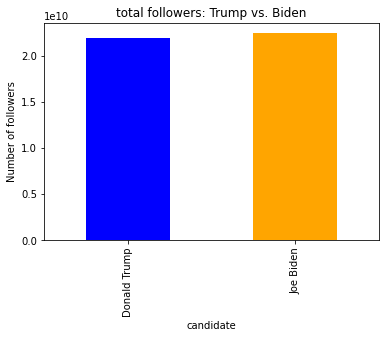

In [12]:
c = ["blue", "orange"]
gb_candidate["user_followers_count"].sum().plot.bar(color = c)
plt.title("total followers: Trump vs. Biden")
plt.ylabel("Number of followers")

As the total number of users followers are significantly larger than number of likes, tweets and retweets, we separate the graph to better visualize the difference. From the bar chart, users that post tweets about Biden have more followers than that about Trump. Tweets from users with more followers are generally more influencial, which means Biden's victory is likely due to the influence of Twitter users. Thus, users followers could be a predictor.

Text(0.5, 0, 'variables')

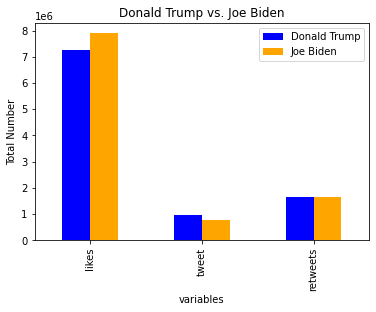

In [30]:
T_likes = Trump["likes"].sum()
T_tweets = Trump["tweet"].count()
T_retweets = Trump["retweet_count"].sum()
Donald_Trump = [T_likes,T_tweets,T_retweets]

B_likes = Biden["likes"].sum()
B_tweets = Biden["tweet"].count()
B_retweets = Biden["retweet_count"].sum()
Joe_Biden = [B_likes,B_tweets,B_retweets]

index = ["likes", "tweet","retweets"]

exposure_data = pd.DataFrame({'Donald Trump':Donald_Trump,"Joe Biden":Joe_Biden}, index = index)
exposure_data.plot.bar(color = c)
plt.title("Donald Trump vs. Joe Biden")
plt.ylabel("Total Number")
plt.xlabel("variables")

Since our research is to examine the relationship between Twitter's features and the election outcome, using bar chart instead of histogram can more efficiently shows the difference. The bar chart above shows the comparison of total number of likes, tweets, and retweets between two candidates. Joe Biden receives a lot more likes than Donald Trump, which means tweets about Biden gain more approval than Donal Trump. However, there are slightly more tweets Donald Trump than Joe Biden. For the number of retweets, there is not a big differece between both candidates. Regardless of whether the tweet is of positive, neutral or negative opinion for candidates, this perspective shows that Joe Biden gain more exposure on twitter before the election. This explains Biden's winning to some extend.

### >>> Timeline Perspective

#### Summary Statistics for Timeline Perspective Analysis: "created_at"

In [57]:
gb_date = mix.groupby(["created_at","candidate"])
gb_date["created_at"].count()

created_at  candidate   
2020-10-15  Donald Trump     18135
            Joe Biden        14949
2020-10-16  Donald Trump     24958
            Joe Biden        17950
2020-10-17  Donald Trump     16958
            Joe Biden        11469
2020-10-18  Donald Trump     17480
            Joe Biden        10374
2020-10-19  Donald Trump     19945
            Joe Biden        10781
2020-10-20  Donald Trump     19053
            Joe Biden        11854
2020-10-21  Donald Trump     20500
            Joe Biden        13443
2020-10-22  Donald Trump     22084
            Joe Biden        16152
2020-10-23  Donald Trump     49353
            Joe Biden        45870
2020-10-24  Donald Trump     19009
            Joe Biden        13105
2020-10-25  Donald Trump     17405
            Joe Biden        14877
2020-10-26  Donald Trump     22289
            Joe Biden        13736
2020-10-27  Donald Trump     22982
            Joe Biden        13616
2020-10-28  Donald Trump     24628
            Joe Biden        1

The third column of numbers is the sum of tweets. The summary statistics above shows the total number of tweets every day for each candidate. 

#### Visualization: Daily Changes in Tweets, Likes and Retweets

<AxesSubplot:title={'center':'Daily Tweets Changes'}, xlabel='Date', ylabel='Number of Tweets'>

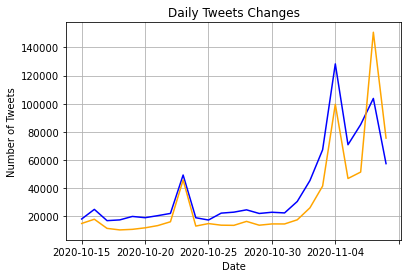

In [60]:
Trump.groupby(["created_at"])['tweet'].count().plot(xlabel = "Date", 
                                                    ylabel = "Number of Tweets",  
                                                    color = 'blue')
Biden.groupby(["created_at"])['tweet'].count().plot(xlabel = "Date", 
                                                    ylabel = "Number of Tweets", 
                                                    title = "Daily Tweets Changes", 
                                                    color = 'orange',
                                                   grid = True)

The line chart above shows the trend in the number of tweets related to each candidate in the month around the election. The BLUE line represents Trump's data and the ORANGE line represents Biden's. The number of tweets related to Trump was larger than Biden's until November 7, but the election was actually on November 3. This means biden's surge in daily tweets and continued to surpass Trump's is due to Biden's election victory. Therefore, the number of tweets per day is not a good predictor of election results

<AxesSubplot:title={'center':'Daily Likes Changes'}, xlabel='Date', ylabel='Number of Likes'>

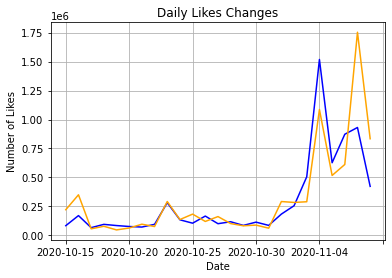

In [61]:
Trump.groupby(["created_at"])['likes'].sum().plot(xlabel = "Date", 
                                                    ylabel = "Number of Likes",  
                                                    color = 'blue')
                        
Biden.groupby(["created_at"])['likes'].sum().plot(xlabel = "Date", 
                                                    ylabel = "Number of Likes", 
                                                    title = "Daily Likes Changes", 
                                                    color = 'orange',
                                                 grid = True)

Similar to the "Daily Tweets Changes", this line chart shows the total number of daily likes on tweets related to the two candidates (Donald Trump in blue and Joe Biden in orange). Before the end of October, the posts related to Trump and Baiyanwe received almost the same number of likes, except for a few small fluctuations, but the closer we got to the election date, Trump got more likes and surpassed Biden's.

<AxesSubplot:title={'center':'Daily Retweets Changes'}, xlabel='Date', ylabel='Number of Retweets'>

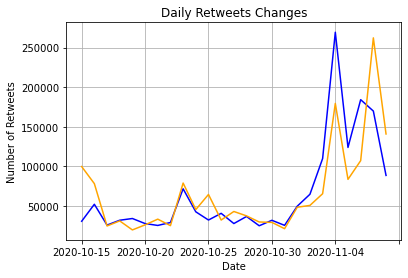

In [63]:
Trump.groupby(["created_at"])['retweet_count'].sum().plot(xlabel = "Date", 
                                                    ylabel = "Number of Retweets",  
                                                    color = 'blue')
Biden.groupby(["created_at"])['retweet_count'].sum().plot(xlabel = "Date", 
                                                    ylabel = "Number of Retweets", 
                                                    title = "Daily Retweets Changes", 
                                                    color = 'orange',
                                                         grid = True)

Similar to the trends in the previous two charts, both candidates were very similar in terms of daily retweets until the end of October. As election day approached, the number of retweets related to both candidates went up, but Trump's numbers still surpassed Biden's.

# Summary

To sum up, a lot of data on Twitter can help us predict the election results to some extent. By comparing the total number of tweets, likes, retweets and followers, we can intuitively see that Joe Biden's influence on social platforms and total topic exposure are higher than Donald Trump’s, which plays a certain role in Biden's election as president. However, since the changes in data could not be seen from the perspective of total exposure, we re-grouped the data according to the date and candidates, and compared how the number of tweets, likes and retweets changed on a daily basis from the perspective of timeline in one month around election date. We found that all the relevant independent variables tended to increase the closer you got to the election date. However, Biden's data were overtaken by Trump's closer to the election date. This is something we'll be exploring in more detail in Future Step.

# Future Step

In the future, we will focus on examining the following issues:

First, in terms of Timeline perspective, since Biden's data was lower than Trump's few days before the election date, which cannot explain the result of Biden's election as president, we will divide the time period into two periods to analyze the trend before and after the election. In this way, we can not only study how the information on Twitter predicts the election results, but also how the election results change the information on Twitter. which means we will focus on the interchangable relationship between the outcome(election result) and covariates(tweets,  likes, retwees, followers).

Secondly, in total exposure Perspective, we analyze the total amount of data, but this leads our analysis to be biased as there are a lot of extreme values. We are not able to see whether the related tweets are positive, neutral or negative for the voters. Therefore, in the following research, we will try to analyze the content of tweets by sorting hashtags and so on. If the positivity or negativity of the posts could be detected, the first issue about Biden having lower numbers than Trump might be explained -- we hypothesized that it was possible that Trump had more posts but mostly negative ones.

Thirdly, due to some bias in the first two perspectives, we cannot confidently infer that the information of Twitter can effectively predict the election results. We will further analyze from the geographical perspective.
